## Import stuff, including UK gov Cov19API

In [24]:
from uk_covid19 import Cov19API
import matplotlib.pyplot as plt

In [159]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

## Load data using API

In [160]:
england_only = [
    'areaType=nation',
    'areaName=England'
]

none = ['areaType=overview']

cases_and_deaths = {
    "date":"date",
    "areaName":"areaName",
    "areaCode":"areaCode",
    "newCasesByPublishDate":"newCasesByPublishDate",
    "newCasesBySpecimenDate":"newCasesBySpecimenDate",
    "cumCasesByPublishDate":"cumCasesByPublishDate",
    "newDeaths28DaysByDeathDate":"newDeaths28DaysByDeathDate"
}

api = Cov19API(filters=none, structure=cases_and_deaths)
data = api.get_json()  # Returns a dictionary

In [161]:
print('Last update: {0}'.format(data['lastUpdate']))

Last update: 2021-07-25T16:41:18.000000Z


## Plot cases

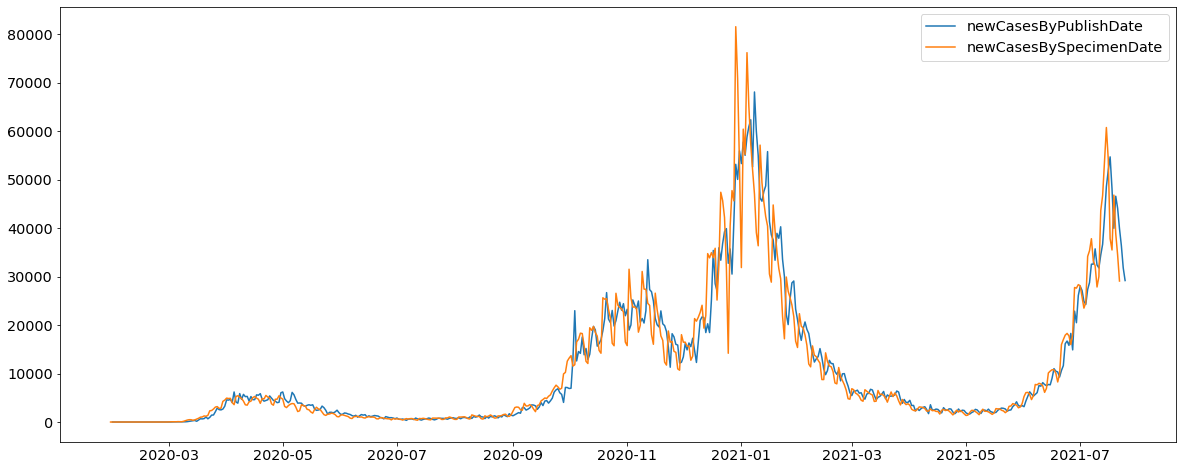

In [162]:
plt.subplots(1, 1)
    
dates = np.array([elem['date'] for elem in data['data']], dtype = np.datetime64)
casesPub = np.array([elem['newCasesByPublishDate'] for elem in data['data']], dtype=np.float32)
casesSpe = np.array([elem['newCasesBySpecimenDate'] for elem in data['data']], dtype=np.float32)   
deathsDea = np.array([elem["newDeaths28DaysByDeathDate"] for elem in data['data']], dtype=np.float32)


plt.plot(dates, casesPub, label = 'newCasesByPublishDate')
plt.plot(dates, casesSpe, label = 'newCasesBySpecimenDate')
plt.legend()

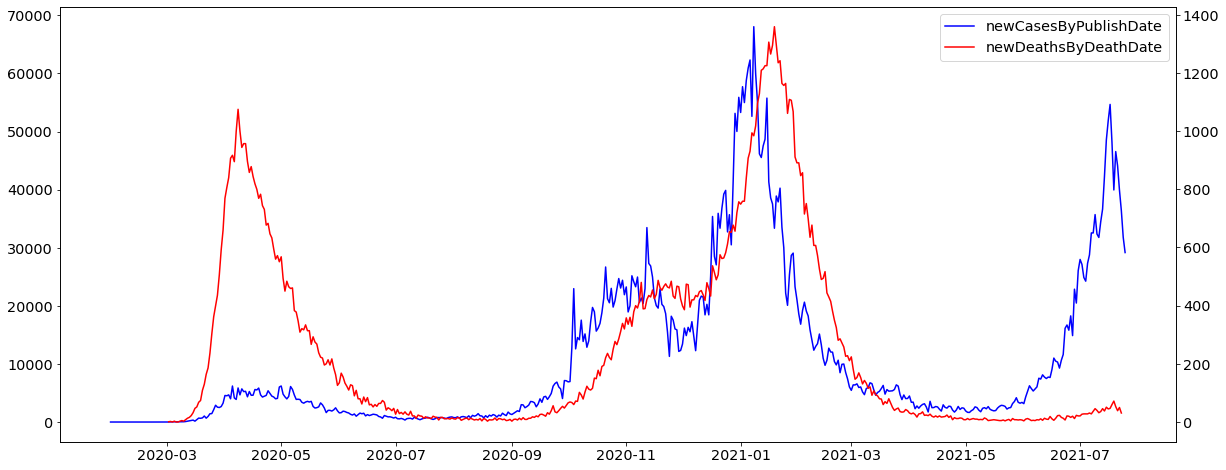

In [163]:
fig, ax = plt.subplots(1, 1)
ax2 = ax.twinx()

plt1 = ax.plot(dates, casesPub, label = 'newCasesByPublishDate', c='b')
plt2 = ax2.plot(dates, deathsDea, label = "newDeathsByDeathDate", c='r')

lns = plt1 + plt2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)


## Deaths / case

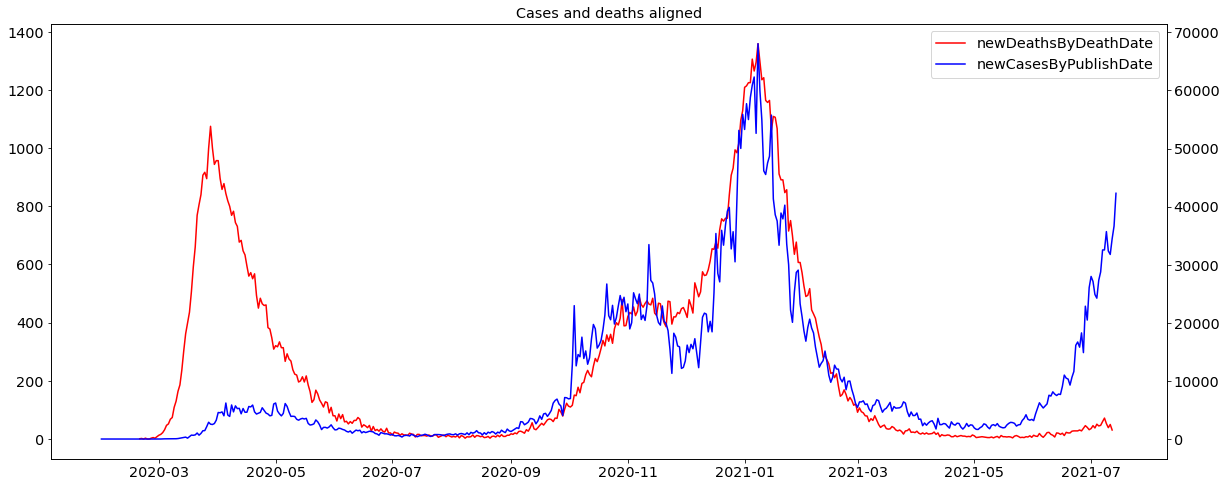

In [189]:
lag = 11

fig, (ax1) = plt.subplots(1, 1, sharex=True)
ax2 = ax1.twinx()

ax2.set_title('Cases and deaths aligned')

plt1 = ax1.plot(dates[lag:], np.array(deathsDea)[:-lag], label = "newDeathsByDeathDate", c='r')
plt2 = ax2.plot(dates[lag:], np.array(casesPub)[lag:], label = 'newCasesByPublishDate', c='b')

lns = plt1 + plt2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

Text(0.5, 1.0, 'Deaths (14 days previous) / Cases')

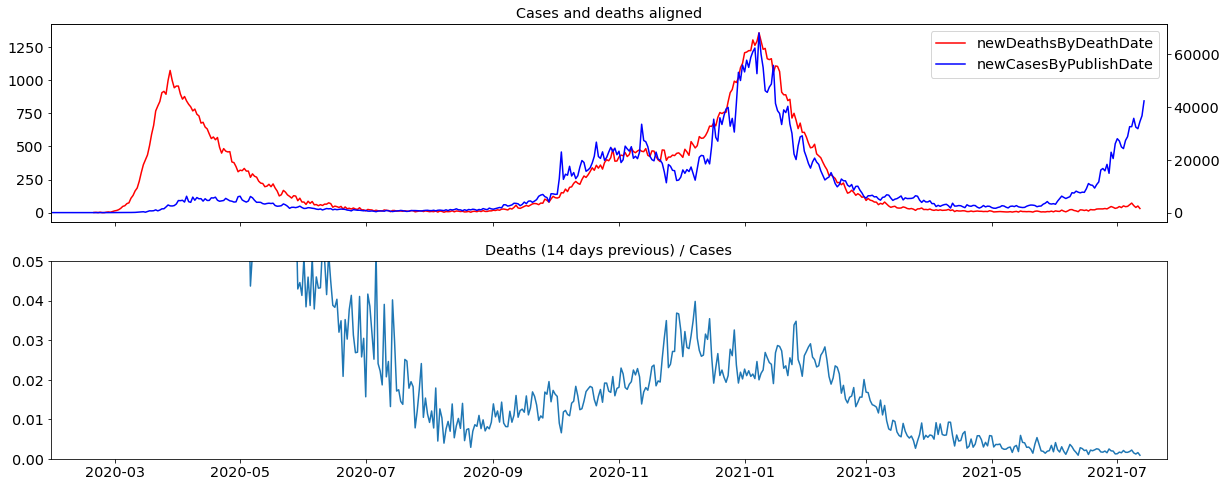

In [203]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

plt.xlim(np.min(dates), np.max(dates))

ax1b = ax1.twinx()

ax1b.set_title('Cases and deaths aligned')

plt1 = ax1.plot(dates[lag:], np.array(deathsDea)[:-lag], label = "newDeathsByDeathDate", c='r')
plt2 = ax1b.plot(dates[lag:], np.array(casesPub)[lag:], label = 'newCasesByPublishDate', c='b')

lns = plt1 + plt2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)


plt2 = ax2.plot(dates[lag:], np.array(deathsDea)[:-lag]/np.array(casesPub)[lag:])
ax2.set_ylim(0, 0.05)
ax2.set_title('Deaths (14 days previous) / Cases')